# Class imbalanced data - SMOTE

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("data/creditcard.csv")
data = data.drop(['Time','Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


#### Data - Credit Card Fraud Detection Data
1. 28개의 컬럼으로 구성
2. 타겟변수는 Class (0, 1 ; 이진분류)

In [3]:
# 데이터 내 NA값 여부 확인. 만약 존재한다면 0으로 대체 혹은, 해당 열을 제외하고 진행.
data.isnull().any()

V1       False
V2       False
V3       False
V4       False
V5       False
V6       False
V7       False
V8       False
V9       False
V10      False
V11      False
V12      False
V13      False
V14      False
V15      False
V16      False
V17      False
V18      False
V19      False
V20      False
V21      False
V22      False
V23      False
V24      False
V25      False
V26      False
V27      False
V28      False
Class    False
dtype: bool

In [4]:
print("Credit Card Fraud Detection data - rows:",data.shape[0]," columns:", data.shape[1])

Credit Card Fraud Detection data - rows: 284807  columns: 29


In [5]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


In [6]:
from collections import Counter

# class = 1 데이터의 비율
cnt = Counter(data.Class)
print(cnt)
print('%.3f %%' % (cnt[1]/data.shape[0]*100))

Counter({0: 284315, 1: 492})
0.173 %


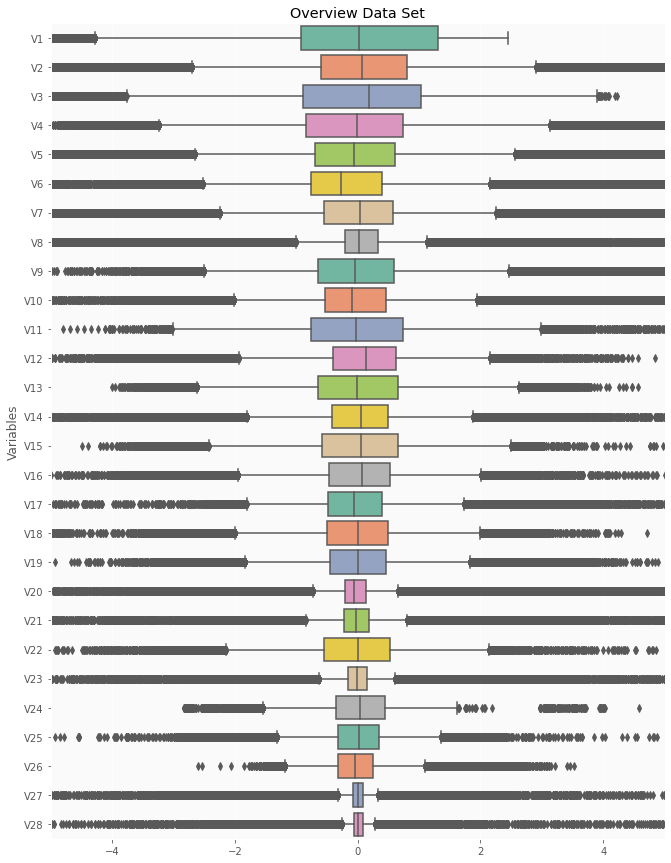

In [7]:
# EDA - 종속 변수의 분포 확인
plt.style.use('ggplot')
f, ax = plt.subplots(figsize = (11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim = (-5, 5))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = data.drop(columns = ['Class']), # V1 ~ V28 확인
                 orient = 'h', 
                 palette = 'Set2')

<Figure size 432x288 with 0 Axes>

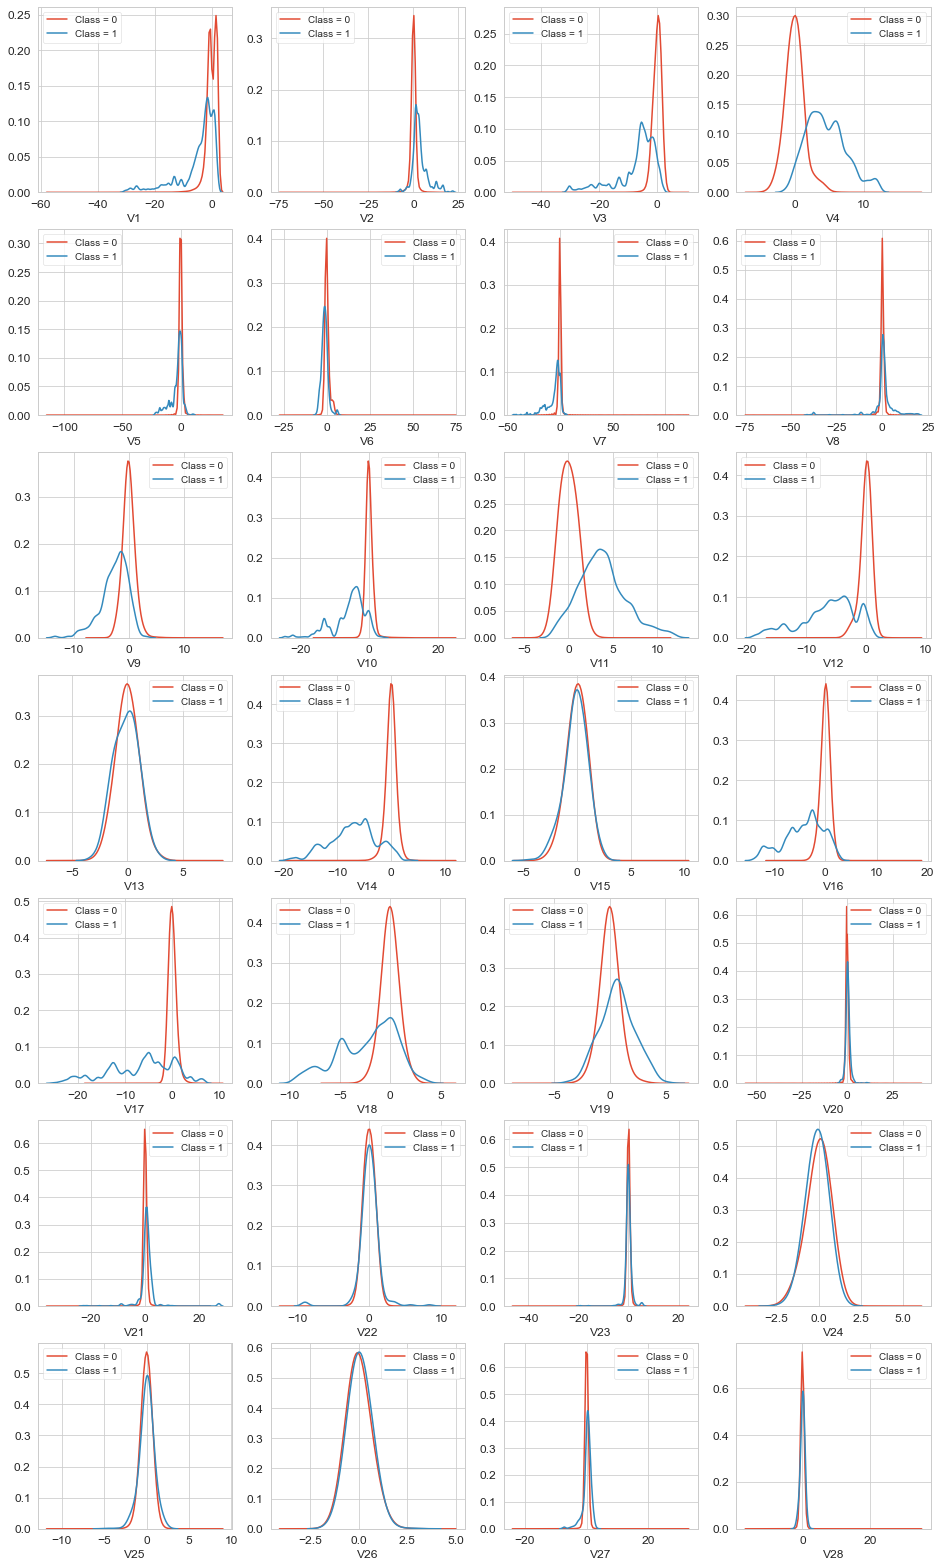

In [8]:
var = data.columns.values[:-1] # V1 ~ V28

i = 0
t0 = data.loc[data['Class'] == 0] # Class : 0 인 행만 추출
t1 = data.loc[data['Class'] == 1] # Class : 1 인 행만 추출

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8, 4, figsize = (16, 28))

for feature in var:
    i += 1
    plt.subplot(7, 4, i) # 28개의 그래프
    sns.kdeplot(t0[feature], bw = 0.5, label = "Class = 0")
    sns.kdeplot(t1[feature], bw = 0.5, label = "Class = 1")
    plt.xlabel(feature, fontsize = 12) # 라벨 속성값
    locs, labels = plt.xticks()
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show();

#### 각 변수 별 그래프를 타겟변수에 대해서 그려보았을 떄 차이가 있는 변수들은 다음과 같이 정의할 수 있다.
- 1) 타겟 변수에 대해 분포 차이가 많이 나는 변수 : V4, V11
- 2) 타겟 변수에 대해 분포 차이가 비교적 많이 존재하는 변수 : V12, V14, V18
- 3) 타겟 변수에 대해 분포 차이가 비교적 적게 존재하는 변수 : V1, V2, V3, V10

In [9]:
X = np.array(data.iloc[:, data.columns != 'Class'])
y = np.array(data.iloc[:, data.columns == 'Class'])

print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (284807, 28)
Shape of y: (284807, 1)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (227845, 28)
y_train dataset:  (227845, 1)
X_test dataset:  (56962, 28)
y_test dataset:  (56962, 1)


In [11]:
# 예측결과 출력함수
def model_evaluation(label, predict):
    cf_matrix = confusion_matrix(label, predict)
    Accuracy = (cf_matrix[0][0] + cf_matrix[1][1]) / sum(sum(cf_matrix))
    Precision = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[0][1])
    Recall = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[1][0])
    F1_Score = (2 * Recall * Precision) / (Recall + Precision)
    print("Model_Evaluation with Label: 1")
    print("Accuracy : ", Accuracy)
    print("Precision: ", Precision)
    print("Recall   : ", Recall)
    print("F1-Score : ", F1_Score)

# Light GBM을 기본 모델로 설정

In [12]:
from sklearn.metrics import confusion_matrix

import random
import lightgbm as lgb
import catboost as cb

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### resampling 없이 불균형 데이터로 학습 진행

In [13]:
lgb_dtrain = lgb.Dataset(data = pd.DataFrame(X_train), label = pd.DataFrame(y_train))

# multiclass
lgb_param = {'max_depth': 10,
            'learning_rate': 0.01,
            'objective': 'multiclass',
            'num_class': len(set(pd.DataFrame(y_train))) + 1}

lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain)
lgb_model_predict = np.argmax(lgb_model.predict(X_test), axis = 1) # Softmax의 결과값 중 가장 큰 값의 Label로 예측

model_evaluation(y_test, lgb_model_predict)

Model_Evaluation with Label: 1
Accuracy:  0.9992977774656788
Precision:  0.9178082191780822
Recall:  0.6633663366336634
F1-Score:  0.7701149425287357


In [14]:
lgb_model.predict(X_test)

array([[9.99164075e-01, 8.35925306e-04],
       [9.99300215e-01, 6.99785042e-04],
       [9.92644780e-01, 7.35522016e-03],
       ...,
       [9.99321066e-01, 6.78934231e-04],
       [9.99321066e-01, 6.78934231e-04],
       [9.99321066e-01, 6.78934231e-04]])

In [15]:
lgb_dtrain = lgb.Dataset(data = pd.DataFrame(X_train), label = pd.DataFrame(y_train))

# binary
lgb_param = {'max_depth': 10,
            'learning_rate': 0.01,
            'objective': 'binary'}

lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain)
pred = np.repeat(0, len(y_test))
pred[lgb_model.predict(X_test) > 0.5] = 1

model_evaluation(y_test, pred)

Model_Evaluation with Label: 1
Accuracy:  0.9992977774656788
Precision:  0.9178082191780822
Recall:  0.6633663366336634
F1-Score:  0.7701149425287357


# SMOTE을 이용해서 Oversampling을 진행해보자!

In [16]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))    # y_train 중 레이블 값이 1인 데이터의 개수
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) # y_train 중 레이블 값이 0 인 데이터의 개수

# Over Sampling 진행
sm = SMOTE(random_state = 42, sampling_strategy = 0.3) # SMOTE 알고리즘, 비율 증가. ratio -> sampling_strategy
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [391]
Before OverSampling, counts of label '0': [227454] 

After OverSampling, counts of label '1': 68236
After OverSampling, counts of label '0': 227454


In [17]:
# SMOTE 적용 이전 데이터
print("Before OverSampling, the shape of X_train: {}".format(X_train.shape))
print("Before OverSampling, the shape of y_train: {}".format(y_train.shape))

# SMOTE 적용 이후 데이터
print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of y_train: {}'.format(y_train_res.shape))

Before OverSampling, the shape of X_train: (227845, 28)
Before OverSampling, the shape of y_train: (227845, 1)
After OverSampling, the shape of X_train: (295690, 28)
After OverSampling, the shape of y_train: (295690,)


In [18]:
lgb_dtrain2 = lgb.Dataset(data = pd.DataFrame(X_train_res), label = pd.DataFrame(y_train_res))

lgb_param2 = {'max_depth': 10,
            'learning_rate': 0.01,
            'objective': 'multiclass',
            'num_class': len(set(pd.DataFrame(y_train_res))) + 1}

lgb_model2 = lgb.train(params = lgb_param2, train_set = lgb_dtrain2)
lgb_model2_predict = np.argmax(lgb_model2.predict(X_test), axis = 1)

model_evaluation(y_test, lgb_model2_predict)

Model_Evaluation with Label: 1
Accuracy:  0.9985253326779256
Precision:  0.554140127388535
Recall:  0.8613861386138614
F1-Score:  0.6744186046511628


# 그렇다면, Oversampling을 더 많이 해보자.

In [19]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm2 = SMOTE(random_state = 42, sampling_strategy = 0.6) # SMOTE 알고리즘, 비율 60%
X_train_res2, y_train_res2 = sm2.fit_sample(X_train, y_train.ravel())

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res2==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res2==0)))

Before OverSampling, counts of label '1': [391]
Before OverSampling, counts of label '0': [227454] 

After OverSampling, counts of label '1': 136472
After OverSampling, counts of label '0': 227454


In [20]:
lgb_dtrain3 = lgb.Dataset(data = pd.DataFrame(X_train_res2), label = pd.DataFrame(y_train_res2))

lgb_param3 = {'max_depth': 10,
            'learning_rate': 0.01,
            'objective': 'multiclass',
            'num_class': len(set(pd.DataFrame(y_train_res2))) + 1}

lgb_model3 = lgb.train(params = lgb_param3, train_set = lgb_dtrain3)
lgb_model3_predict = np.argmax(lgb_model3.predict(X_test), axis = 1)

model_evaluation(y_test, lgb_model3_predict)

Model_Evaluation with Label: 1
Accuracy:  0.9945051086689372
Precision:  0.2268041237113402
Recall:  0.8712871287128713
F1-Score:  0.35991820040899797


# 아예, 1:1 비율로 Oversampling을 해보자.

In [21]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm3 = SMOTE(random_state = 42) # SMOTE 알고리즘, Default: 동등
X_train_res3, y_train_res3 = sm3.fit_sample(X_train, y_train.ravel())

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res3==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res3==0)))

Before OverSampling, counts of label '1': [391]
Before OverSampling, counts of label '0': [227454] 

After OverSampling, counts of label '1': 227454
After OverSampling, counts of label '0': 227454


In [22]:
lgb_dtrain4 = lgb.Dataset(data = pd.DataFrame(X_train_res3), label = pd.DataFrame(y_train_res3))

lgb_param4 = {'max_depth': 10,
            'learning_rate': 0.01,
            'objective': 'multiclass', 
            'num_class': len(set(pd.DataFrame(y_train_res3))) + 1}

lgb_model4 = lgb.train(params = lgb_param4, train_set = lgb_dtrain4)
lgb_model4_predict = np.argmax(lgb_model4.predict(X_test), axis = 1)

model_evaluation(y_test, lgb_model4_predict)

Model_Evaluation with Label: 1
Accuracy:  0.9879568835363927
Precision:  0.11764705882352941
Recall:  0.8910891089108911
F1-Score:  0.20785219399538107


## 비율이 30%가 적당하다. 그럼 BLSM과 비교해보자!

In [23]:
# BLSM (Borderline SMOTE)
sm4 = BorderlineSMOTE(random_state = 42, sampling_strategy = 0.6) # BLSM 알고리즘 적용
X_train_res4, y_train_res4 = sm4.fit_sample(X_train, y_train.ravel()) # Over Sampling 적용

In [24]:
lgb_dtrain5 = lgb.Dataset(data = pd.DataFrame(X_train_res4), label = pd.DataFrame(y_train_res4))

lgb_param5 = {'max_depth': 10,
            'learning_rate': 0.01,
            'objective': 'multiclass',
            'num_class': len(set(pd.DataFrame(y_train_res4))) + 1}

lgb_model5 = lgb.train(params = lgb_param5, train_set = lgb_dtrain5)
lgb_model5_predict = np.argmax(lgb_model5.predict(X_test), axis = 1)

model_evaluation(y_test, lgb_model5_predict)

Model_Evaluation with Label: 1
Accuracy:  0.9972613321161476
Precision:  0.3788546255506608
Recall:  0.8514851485148515
F1-Score:  0.524390243902439


# BLSM보다 기본 SMOTE가 성능이 좋다. 이를 바탕으로 다양한 모델에 적용
- 선형회귀(로지스틱), Random Forest, CatBoost

In [25]:
# BLSM을 이용해서 Oversampling 한 학습 데이터 셋 : X_train_res2, y_train_res2
# sklearn 의 Logistic Regression은 기본적으로 Ridge 정규화가 포함되어 있기 때문에, 
# 정규화 텀을 억제하는 C를 크게 적용한다 (C:Inverse of regularization strength)

lr_model = LogisticRegression(C = 1e+10) 
lr_model.fit(X_train_res, y_train_res)
lr_predict = lr_model.predict(X_test)
model_evaluation(y_test, lr_predict)

Model_Evaluation with Label: 1
Accuracy:  0.992451107756048
Precision:  0.1780821917808219
Recall:  0.900990099009901
F1-Score:  0.2973856209150327


In [26]:
np.sum(lr_predict==1)

511

In [27]:
# 라쏘 로지스틱 회귀모형 학습
lasso_model = LogisticRegression() # Penalty = l1 Regularizer, C = 1.0 (Default))
lasso_model.fit(X_train_res, y_train_res)
lasso_predict = lasso_model.predict(X_test)
model_evaluation(y_test, lasso_predict)

Model_Evaluation with Label: 1
Accuracy:  0.992451107756048
Precision:  0.1780821917808219
Recall:  0.900990099009901
F1-Score:  0.2973856209150327


In [28]:
np.sum(lasso_predict==1)

511

In [29]:
# 릿지 로지스틱 회귀모형 학습
ridge_model = LogisticRegression(penalty = 'l2')
ridge_model.fit(X_train_res, y_train_res)
ridge_predict = ridge_model.predict(X_test)
model_evaluation(y_test, ridge_predict)

Model_Evaluation with Label: 1
Accuracy:  0.992451107756048
Precision:  0.1780821917808219
Recall:  0.900990099009901
F1-Score:  0.2973856209150327


In [30]:
np.sum(ridge_predict==1)

511

In [31]:
# Random Forest
random_forest_model = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 42)
rf_model = random_forest_model.fit(X_train_res, y_train_res)
rf_predict = rf_model.predict(X_test)
model_evaluation(y_test, rf_predict)

Model_Evaluation with Label: 1
Accuracy:  0.9991748885221726
Precision:  0.7288135593220338
Recall:  0.8514851485148515
F1-Score:  0.7853881278538813


In [32]:
cb_dtrain = cb.Pool(data = X_train_res, label = y_train_res) # 학습 데이터를 Catboost 모델에 맞게 변환

cb_param = {'max_depth': 10,
            'learning_rate': 0.01,
            'n_estimators': 50,
            'verbose': False,
            'eval_metric': 'Accuracy',
            'loss_function': 'MultiClass'}

cb_model = cb.train(pool = cb_dtrain, params = cb_param)
cb_model_predict = np.argmax(cb_model.predict(X_test), axis = 1)

model_evaluation(y_test, cb_model_predict)

Model_Evaluation with Label: 1
Accuracy:  0.9983848881710614
Precision:  0.5272727272727272
Recall:  0.8613861386138614
F1-Score:  0.6541353383458646


# Ensemble의 Ensemble
- 성능이 가장 좋은 Random Forest 모델을 바탕으로 진행

In [33]:
bagging_predict_result = []
number_of_bagging = 5

for _ in range(number_of_bagging):
    data_index = [data_index for data_index in range(X_train_res.shape[0])] # 학습 데이터의 인덱스를 리스트로 변환
    random_data_index = np.random.choice(data_index, X_train_res.shape[0])
    
    random_forest_model2 = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 42)
    
    rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index,],
                                         y = pd.DataFrame(y_train_res).iloc[random_data_index,])
    
    rf_predict2 = rf_model2.predict(X_test)
    bagging_predict_result.append(rf_predict2)
    
    print(_+1, "Model Evaluation Result:", "\n") # 전체적인 성능 평가   
    model_evaluation(y_test, rf_predict2) # 모델 분류 평가 결과

C:\Anaconda3\envs\py37_env\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


1 Model Evaluation Result: 

Model_Evaluation with Label: 1
Accuracy:  0.9991924440855307
Precision:  0.7350427350427351
Recall:  0.8514851485148515
F1-Score:  0.7889908256880734


C:\Anaconda3\envs\py37_env\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


2 Model Evaluation Result: 

Model_Evaluation with Label: 1
Accuracy:  0.9991748885221726
Precision:  0.7288135593220338
Recall:  0.8514851485148515
F1-Score:  0.7853881278538813


C:\Anaconda3\envs\py37_env\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


3 Model Evaluation Result: 

Model_Evaluation with Label: 1
Accuracy:  0.9992099996488887
Precision:  0.7413793103448276
Recall:  0.8514851485148515
F1-Score:  0.792626728110599


C:\Anaconda3\envs\py37_env\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


4 Model Evaluation Result: 

Model_Evaluation with Label: 1
Accuracy:  0.9992099996488887
Precision:  0.7413793103448276
Recall:  0.8514851485148515
F1-Score:  0.792626728110599


C:\Anaconda3\envs\py37_env\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


5 Model Evaluation Result: 

Model_Evaluation with Label: 1
Accuracy:  0.9991573329588147
Precision:  0.7226890756302521
Recall:  0.8514851485148515
F1-Score:  0.7818181818181817


# Bagging을 바탕으로 예측한 결과값에 대해 다수결로 예측

In [34]:
bagging_predict = []

for lst2_index in range(X_test.shape[0]): # 테스트 데이터 개수만큼 반복
    temp_predict = []
    for lst_index in range(len(bagging_predict_result)): # Bagging 결과 리스트 개수 만큼 반복
        temp_predict.append(bagging_predict_result[lst_index][lst2_index]) # 각 Bagging 결과 예측한 값 중 같은 인덱스를 리스트에 저장
        
    if np.mean(temp_predict) >= 0.5: # 0, 1 이진분류이므로, 예측값의 평균이 0.5보다 크면 1, 아니면 0으로 예측 다수결)
        bagging_predict.append(1)
    elif np.mean(temp_predict) < 0.5: # 예측값의 평균이 0.5보다 낮으면 0으로 결과 저장
        bagging_predict.append(0)
        
model_evaluation(y_test, bagging_predict)

Model_Evaluation with Label: 1
Accuracy:  0.9992275552122467
Precision:  0.7478260869565218
Recall:  0.8514851485148515
F1-Score:  0.7962962962962963


In [35]:
rf_model2.predict(X_test) 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
bagging_predict_result = 0 
number_of_bagging = 5

for i in range(number_of_bagging):
    data_index = [data_index for data_index in range(X_train_res.shape[0])]
    random_data_index = np.random.choice(data_index, X_train_res.shape[0])
    random_forest_model2 = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 42)
    
    rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],
                                       y = pd.DataFrame(y_train_res).iloc[random_data_index])
    
    rf_predict2 = rf_model2.predict_proba(X_test)[: , 1]
    bagging_predict_result=bagging_predict_result+(rf_predict2)
    print(i)

C:\Anaconda3\envs\py37_env\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


0


C:\Anaconda3\envs\py37_env\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


1


C:\Anaconda3\envs\py37_env\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


2


C:\Anaconda3\envs\py37_env\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


3


C:\Anaconda3\envs\py37_env\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


4


In [37]:
pred = np.repeat(0,len(y_test))
pred[bagging_predict_result/2 > 0.5] = 1
model_evaluation(y_test, pred)

Model_Evaluation with Label: 1
Accuracy:  0.9929602190934307
Precision:  0.1875
Recall:  0.8910891089108911
F1-Score:  0.30981067125645445


In [38]:
pred = np.repeat(0,len(y_test))
pred[bagging_predict_result/2 > 0.5] = 1
model_evaluation(y_test, pred)

Model_Evaluation with Label: 1
Accuracy:  0.9929602190934307
Precision:  0.1875
Recall:  0.8910891089108911
F1-Score:  0.30981067125645445


In [39]:
def cut_off(y,threshold):
    Y = y.copy()
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))

In [40]:
threshold = np.arange(0,1,0.1)

In [41]:
threshold

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [42]:
for i in threshold :
    pred_y = cut_off(bagging_predict_result /2 ,i)
    print(i)
    model_evaluation(y_test, pred_y)

0.0
Model_Evaluation with Label: 1
Accuracy:  0.001773111899160844
Precision:  0.001773111899160844
Recall:  1.0
F1-Score:  0.003539947076038764
0.1
Model_Evaluation with Label: 1
Accuracy:  0.8720550542466908
Precision:  0.013273736963294053
Recall:  0.9702970297029703
F1-Score:  0.026189203634420094
0.2
Model_Evaluation with Label: 1
Accuracy:  0.9507215336540149
Precision:  0.033448275862068964
Recall:  0.9603960396039604
F1-Score:  0.06464511829390203
0.30000000000000004
Model_Evaluation with Label: 1
Accuracy:  0.9773182121414277
Precision:  0.0681653372008702
Recall:  0.9306930693069307
F1-Score:  0.12702702702702703
0.4
Model_Evaluation with Label: 1
Accuracy:  0.9876584389593062
Precision:  0.11607142857142858
Recall:  0.900990099009901
F1-Score:  0.20564971751412434
0.5
Model_Evaluation with Label: 1
Accuracy:  0.9929602190934307
Precision:  0.1875
Recall:  0.8910891089108911
F1-Score:  0.30981067125645445
0.6000000000000001
Model_Evaluation with Label: 1
Accuracy:  0.99610266

In [43]:
p_list = np.repeat(1/X_train_res.shape[0], X_train_res.shape[0])
p_list[rf_model2.predict(X_train_res) != y_train_res] = p_list[rf_model2.predict(X_train_res) != y_train_res]*2

In [44]:
p_list[rf_model2.predict(X_train_res) != y_train_res]

array([6.76384051e-06, 6.76384051e-06, 6.76384051e-06, ...,
       6.76384051e-06, 6.76384051e-06, 6.76384051e-06])

In [45]:
p_list = p_list/sum(p_list)

In [46]:
sum(p_list)

1.0000000000067748

In [47]:
bagging_predict_result = 0 
number_of_bagging = 5 

for i in range(number_of_bagging):
    data_index = [data_index for data_index in range(X_train_res.shape[0])] # 학습 데이터의 인덱스를 리스트로 변환
    
    if i == 0 : 
        plist= np.repeat(1/X_train_res.shape[0], X_train_res.shape[0])
    else :
        p_list=np.repeat(1/X_train_res.shape[0], X_train_res.shape[0])
        p_list[rf_model2.predict(X_train_res) != y_train_res] = p_list[rf_model2.predict(X_train_res) != y_train_res]*2
        
    random_data_index = np.random.choice(data_index, X_train_res.shape[0], p=plist)
    random_forest_model2 = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 42)
    
    rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index,],
                                         y = pd.DataFrame(y_train_res).iloc[random_data_index])
    
    rf_predict2 = rf_model2.predict_proba(X_test)[:, 1]
    bagging_predict_result=bagging_predict_result+(rf_predict2)
    print(i)

C:\Anaconda3\envs\py37_env\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0


C:\Anaconda3\envs\py37_env\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1


C:\Anaconda3\envs\py37_env\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


2


C:\Anaconda3\envs\py37_env\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


3


C:\Anaconda3\envs\py37_env\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


4


In [48]:
for i in threshold :
    pred_y = cut_off(bagging_predict_result /2 ,i)
    print(i)
    model_evaluation(y_test, pred_y)

0.0
Model_Evaluation with Label: 1
Accuracy:  0.001773111899160844
Precision:  0.001773111899160844
Recall:  1.0
F1-Score:  0.003539947076038764
0.1
Model_Evaluation with Label: 1
Accuracy:  0.8677890523506899
Precision:  0.012850773669027014
Recall:  0.9702970297029703
F1-Score:  0.025365601138863728
0.2
Model_Evaluation with Label: 1
Accuracy:  0.9509848671043853
Precision:  0.03329864724245578
Recall:  0.9504950495049505
F1-Score:  0.064343163538874
0.30000000000000004
Model_Evaluation with Label: 1
Accuracy:  0.977581545591798
Precision:  0.0689149560117302
Recall:  0.9306930693069307
F1-Score:  0.12832764505119454
0.4
Model_Evaluation with Label: 1
Accuracy:  0.9876057722692321
Precision:  0.1156289707750953
Recall:  0.900990099009901
F1-Score:  0.20495495495495497
0.5
Model_Evaluation with Label: 1
Accuracy:  0.9933815526140234
Precision:  0.19868995633187772
Recall:  0.900990099009901
F1-Score:  0.32558139534883723
0.6000000000000001
Model_Evaluation with Label: 1
Accuracy:  0.9